c:\Users\wjsrh\Desktop\전광민\01.MicroSoft_Bootcamp\9-1. 실습\notebooks\DL3_20241006\ch05
c:\Users\wjsrh\Desktop\전광민\01.MicroSoft_Bootcamp\9-1. 실습\notebooks\DL3_20241006
epoch:0, train acc:0.17666666666666667, test acc:0.1523
epoch:1, train acc:0.2, test acc:0.1667
epoch:2, train acc:0.21, test acc:0.1745
epoch:3, train acc:0.22333333333333333, test acc:0.1864
epoch:4, train acc:0.22333333333333333, test acc:0.1975
epoch:5, train acc:0.24666666666666667, test acc:0.2089
epoch:6, train acc:0.25333333333333335, test acc:0.2153
epoch:7, train acc:0.25666666666666665, test acc:0.227
epoch:8, train acc:0.27, test acc:0.2364
epoch:9, train acc:0.3, test acc:0.2547
epoch:10, train acc:0.30666666666666664, test acc:0.2676
epoch:11, train acc:0.3333333333333333, test acc:0.2812
epoch:12, train acc:0.3466666666666667, test acc:0.292
epoch:13, train acc:0.35333333333333333, test acc:0.2969
epoch:14, train acc:0.39, test acc:0.3099
epoch:15, train acc:0.47333333333333333, test acc:0.3371
epoch:16, trai

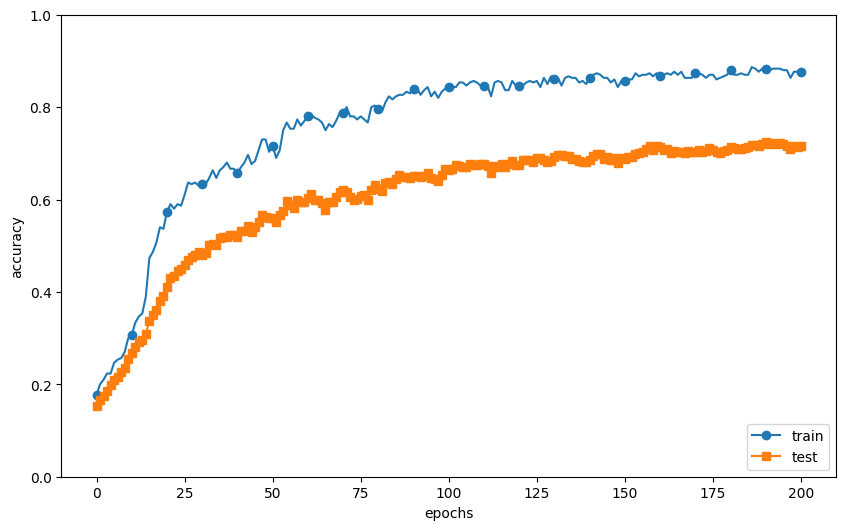

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, 
                         hidden_size_list=[100, 100, 100, 100],
                         output_size=10, weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(100000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch,t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        print("epoch:" + str(epoch_cnt)+", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break




markers = {"train": "o", "test": "s"}
x = np.arange(max_epochs)
plt.figure(figsize=(10, 6))
plt.plot(x, train_acc_list, marker='o', label='train', markevery= 10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery= 1)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0) # 범위를 조금 넓혔습니다
plt.legend(loc='lower right')
plt.show()
